# How to train the Baseline Models

### This notebook will show how to
- instantiate dataloader for the all 7 datasets of the competition
- build and train a `Generalization` model, that is trained on all 7 datasets
- compute the performance metrics on the test set of all the "pre-training" recordings (where the "live test set" is available)
- get the estimated receptive field positions of the neurons (i.e. the model readout position)
- visualize retinotopy: showing the correspondence between receptive fields and the anatomical coordinates within V1

### Imports

In [8]:
# # Install required packages
# ! pip install --upgrade pip
# ! pip install setuptools --upgrade
# ! pip install nnfabrik
# ! pip install datajoint
# ! pip install GitPython
# # ! pip install neuralpredictors
# ! pip install git+https://github.com/xup5/neuralpredictors.git
# ! pip install albumentations==1.2.1
# ! pip install scikit-image==0.19.3
# ! pip install matplotlib==3.1.3

In [9]:
# from google.colab import drive
# drive.mount('/content/drive')
# import sys
# sys.path.insert(0, '/content/drive/MyDrive/Sensorium/')

# import torch
# import numpy as np
# import pandas as pd

# import matplotlib.pyplot as plt
# import seaborn as sns

# import warnings
# warnings.filterwarnings('ignore')

# from nnfabrik.builder import get_data, get_model, get_trainer

In [1]:
import sys
sys.path.insert(0, '/home/xupan/Projects/Sensorium2022/')

import torch
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from nnfabrik.builder import get_data, get_model, get_trainer

### Instantiate DataLoader

In [2]:
import os

basepath = "/home/xupan/Projects/Sensorium2022/data"

# as filenames, we'll select all 7 datasets
filenames = [os.path.join(basepath, file) for file in os.listdir(basepath) if "static" in file ]

dataset_fn = 'sensorium.datasets.static_loaders'
dataset_config = {'paths': filenames,
                 'normalize': True,
                 'include_behavior': False,
                 'include_eye_position': True,
                 'batch_size': 128,
                 'scale':.25,
                 }

dataloaders = get_data(dataset_fn, dataset_config)

now, our dataloaders contain one `data_key` (or "dataset_name") for each dataset

In [3]:
dataloaders

OrderedDict([('train',
              OrderedDict([('22846-10-16',
                            <torch.utils.data.dataloader.DataLoader at 0x7f303d79b940>),
                           ('27204-5-13',
                            <torch.utils.data.dataloader.DataLoader at 0x7f3024637c10>),
                           ('21067-10-18',
                            <torch.utils.data.dataloader.DataLoader at 0x7f3024637580>),
                           ('26872-17-20',
                            <torch.utils.data.dataloader.DataLoader at 0x7f30246535e0>),
                           ('23964-4-22',
                            <torch.utils.data.dataloader.DataLoader at 0x7f303d79b490>),
                           ('23656-14-22',
                            <torch.utils.data.dataloader.DataLoader at 0x7f3024648880>),
                           ('23343-5-17',
                            <torch.utils.data.dataloader.DataLoader at 0x7f30246527f0>)])),
             ('validation',
              OrderedDict

# Instantiate State of the Art Model (SOTA)

In [4]:
# model_fn = 'sensorium.models.stacked_core_full_gauss_readout'
model_fn = 'sensorium.models.my_model'
core_config = {
    'hidden_channels': 64,
    'input_kern': 9,
    'hidden_kern': 7,
    'layers': 4,
    'gamma_input': 6.3831,
    'skip': 0,
    'final_nonlinearity': True,
    'bias': False,
    'momentum': 0.9,
    'pad_input': False,
    'batch_norm': True,
    'hidden_dilation': 1,
    'laplace_padding': None,
    'input_regularizer': "LaplaceL2norm",
    'stack': 1,
    'depth_separable': True,
    'linear': False,
    'attention_conv': False,
    'hidden_padding': None,
    'use_avg_reg': False,
    'stride': 2,
    'output_shape': (28, 56)
}

readout_config = {
    'init_mu_range': 0.3,
    'bias': True,
    'init_sigma': 0.1,
    'gamma_readout': 0.0076,
    'gauss_type': "full",
    'grid_mean_predictor': {'type': 'cortex',
   'input_dimensions': 2,
   'hidden_layers': 1,
   'hidden_features': 30,
   'final_tanh': True},
}


model_config = {
    'core_config': core_config,
    'readout_config': readout_config,
    
    'shifter': True,
    'shifter_type': "MLP",
    'input_channels_shifter': 2,
    'hidden_channels_shifter': 5,
    'shift_layers': 3,
    'gamma_shifter': 0,
    'shifter_bias': True,
    'elu_offset': 0,
}

model = get_model(model_fn=model_fn,
                  model_config=model_config,
                  dataloaders=dataloaders,
                  seed=42,)

In [4]:
from neuralpredictors.layers.cores import my_Stacked2dCore
model_fn = 'sensorium.models.multicore_model'
core_config_1 = {
    'hidden_channels': 32,
    'input_kern': 9,
    'hidden_kern': 7,
    'layers': 4,
    'gamma_input': 6.3831,
    'skip': 0,
    'final_nonlinearity': True,
    'bias': False,
    'momentum': 0.9,
    'pad_input': False,
    'batch_norm': True,
    'hidden_dilation': 1,
    'laplace_padding': None,
    'input_regularizer': "LaplaceL2norm",
    'stack': 0,
    'depth_separable': True,
    'linear': False,
    'attention_conv': False,
    'hidden_padding': None,
    'use_avg_reg': False,
    'stride': 1,
    'output_shape': (28, 56)
}

core_config_2 = {
    'hidden_channels': 16,
    'input_kern': 9,
    'hidden_kern': 7,
    'layers': 2,
    'gamma_input': 6.3831,
    'skip': 0,
    'final_nonlinearity': True,
    'bias': False,
    'momentum': 0.9,
    'pad_input': False,
    'batch_norm': True,
    'hidden_dilation': 1,
    'laplace_padding': None,
    'input_regularizer': "LaplaceL2norm",
    'stack': 1,
    'depth_separable': True,
    'linear': False,
    'attention_conv': False,
    'hidden_padding': None,
    'use_avg_reg': False,
    'stride': 2,
    'output_shape': (28, 56)
}

readout_config = {
    'init_mu_range': 0.3,
    'bias': True,
    'init_sigma': 0.1,
    'gamma_readout': 0.0076,
    'gauss_type': "full",
    'grid_mean_predictor': {'type': 'cortex',
   'input_dimensions': 2,
   'hidden_layers': 1,
   'hidden_features': 30,
   'final_tanh': True},
}


model_config = {
    'core_configs': [core_config_1, core_config_2],
    'core_types': [my_Stacked2dCore, my_Stacked2dCore],
    
    'readout_config': readout_config,
    
    'shifter': True,
    'shifter_type': "MLP",
    'input_channels_shifter': 2,
    'hidden_channels_shifter': 5,
    'shift_layers': 3,
    'gamma_shifter': 0,
    'shifter_bias': True,
    'elu_offset': 0,
}

model = get_model(model_fn=model_fn,
                  model_config=model_config,
                  dataloaders=dataloaders,
                  seed=42,)

The model has one shared core, but for each dataset, it has a separate readout and shifter network

In [5]:
print(model)

FiringRateEncoder(
  (core): MultiCore(
    (cores): ModuleList(
      (0): my_Stacked2dCore(
        (_input_weights_regularizer): LaplaceL2norm(
          (laplace): Laplace()
        )
        (features): Sequential(
          (layer0): Sequential(
            (conv): Conv2d(1, 32, kernel_size=(9, 9), stride=(1, 1), bias=False)
            (norm): BatchNorm2d(32, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
            (nonlin): AdaptiveELU()
          )
          (layer1): Sequential(
            (ds_conv): DepthSeparableConv2d(
              (in_depth_conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (spatial_conv): Conv2d(32, 32, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=32, bias=False)
              (out_depth_conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
            )
            (norm): BatchNorm2d(32, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
            (nonlin): 

## Configure Trainer

In [6]:
trainer_fn = "sensorium.training.standard_trainer"

trainer_config = {'max_iter': 200,
                 'verbose': False,
                 'lr_decay_steps': 4,
                 'avg_loss': False,
                 'lr_init': 0.009,
                 }

trainer = get_trainer(trainer_fn=trainer_fn, 
                     trainer_config=trainer_config)

# Run model training

In [7]:
validation_score, trainer_output, state_dict = trainer(model, dataloaders, seed=42)

Epoch 94: 100%|███████████████████████████████| 252/252 [01:07<00:00,  3.72it/s]


In [31]:
torch.save(model.state_dict(), '/home/xupan/Projects/Sensorium2022/tutorial/model_checkpoints/generalization_model_stack.pth')

# (or load our pretrained checkpoints)

In [56]:
model.load_state_dict(torch.load("/home/xupan/Projects/Sensorium2022/tutorial/model_checkpoints/pretrained/generalization_model.pth"));

In [57]:
model.eval();

---

# Model evaluation

In [8]:
from sensorium.utility import get_correlations, get_signal_correlations, get_fev
from sensorium.utility.measure_helpers import get_df_for_scores

In [9]:
def model_score(model, dataloaders, tier="test", device="cuda", as_dict=True):
    single_trial_correlation = get_correlations(model, dataloaders, tier=tier, device=device, as_dict=as_dict)
    average_stc = []
    for key in single_trial_correlation.keys():
        if key != '27204-5-13' and key != '26872-17-20':
            average_stc.append(single_trial_correlation[key].mean())
    score1 = np.mean(average_stc)
    
    correlation_to_average = get_signal_correlations(model, dataloaders, tier=tier, device=device, as_dict=as_dict)
    average_cta = []
    for key in correlation_to_average.keys():
        if key != '27204-5-13' and key != '26872-17-20':
            average_cta.append(correlation_to_average[key].mean())
    score2 = np.mean(average_cta)
    
    feves = get_fev(model, dataloaders, tier=tier, device=device, as_dict=as_dict)
    average_feves = []
    for key in feves.keys():
        if key != '27204-5-13' and key != '26872-17-20':
            average_feves.append(feves[key].mean())
    score3 = np.mean(average_feves)
    print(f'single trial correlation: {score1}, correlation to average: {score2}, fev: {score3}')

In [10]:
model_score(model, dataloaders)

single trial correlation: 0.3293669819831848, correlation to average: 0.5629599690437317, fev: 0.5352887511253357


## Single Trial Correlation

In [10]:
single_trial_correlation = get_correlations(model, dataloaders, tier="test", device="cuda", as_dict=True)


In [11]:
print(single_trial_correlation)

{'22846-10-16': array([0.3574556 , 0.3478832 , 0.25385895, ..., 0.41246828, 0.6480072 ,
       0.49218848], dtype=float32), '27204-5-13': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), '21067-10-18': array([0.5727539 , 0.16901618, 0.08065403, ..., 0.22879498, 0.38687927,
       0.20745398], dtype=float32), '26872-17-20': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), '23964-4-22': array([0.29450437, 0.3910041 , 0.19777283, ..., 0.42469743, 0.28383195,
       0.2728361 ], dtype=float32), '23656-14-22': array([0.2615645 , 0.5486317 , 0.35861602, ..., 0.5019085 , 0.5116971 ,
       0.30047804], dtype=float32), '23343-5-17': array([0.147035  , 0.3946676 , 0.23915009, ..., 0.39536592, 0.20077471,
       0.36508092], dtype=float32)}


In [17]:
average_stc = []
for key in single_trial_correlation.keys():
    if key != '27204-5-13' and key != '26872-17-20':
        average_stc.append(single_trial_correlation[key].mean())
np.mean(average_stc)

0.3468423

In [12]:
df = get_df_for_scores(session_dict=single_trial_correlation,
                                    measure_attribute="Single Trial Correlation"
                      )

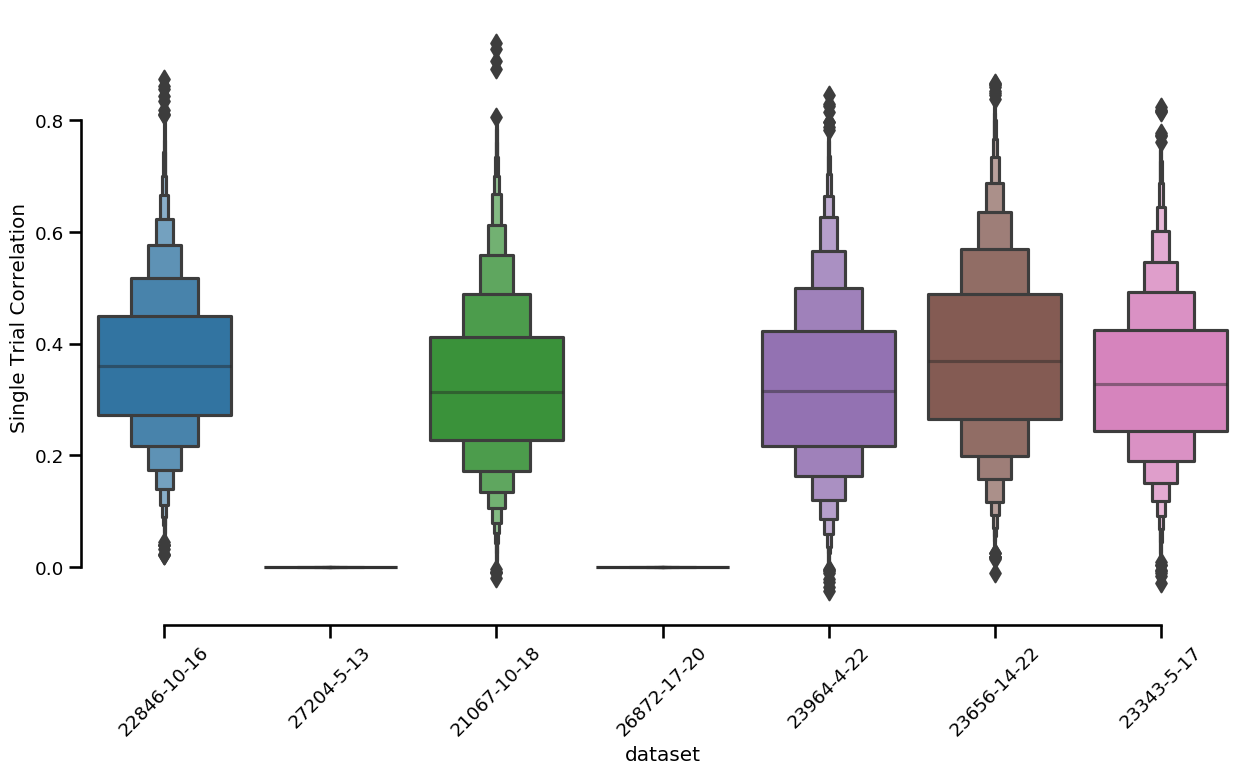

In [13]:
sns.set_context("talk", font_scale=.8)
fig = plt.figure(figsize=(15,8))
sns.boxenplot(x="dataset", y="Single Trial Correlation", data=df, )
plt.xticks(rotation = 45);
sns.despine(trim=True)

**Note** how for two datasets, the correlations are 0. Those are our 2 competition scans, for which the test data is withheld.

## Correlation to Average

In [18]:
correlation_to_average = get_signal_correlations(model, dataloaders, tier="test", device="cuda", as_dict=True)


In [19]:
measure_attribute = "Correlation to Average"
df = get_df_for_scores(session_dict=correlation_to_average,
                                    measure_attribute=measure_attribute,
                      )

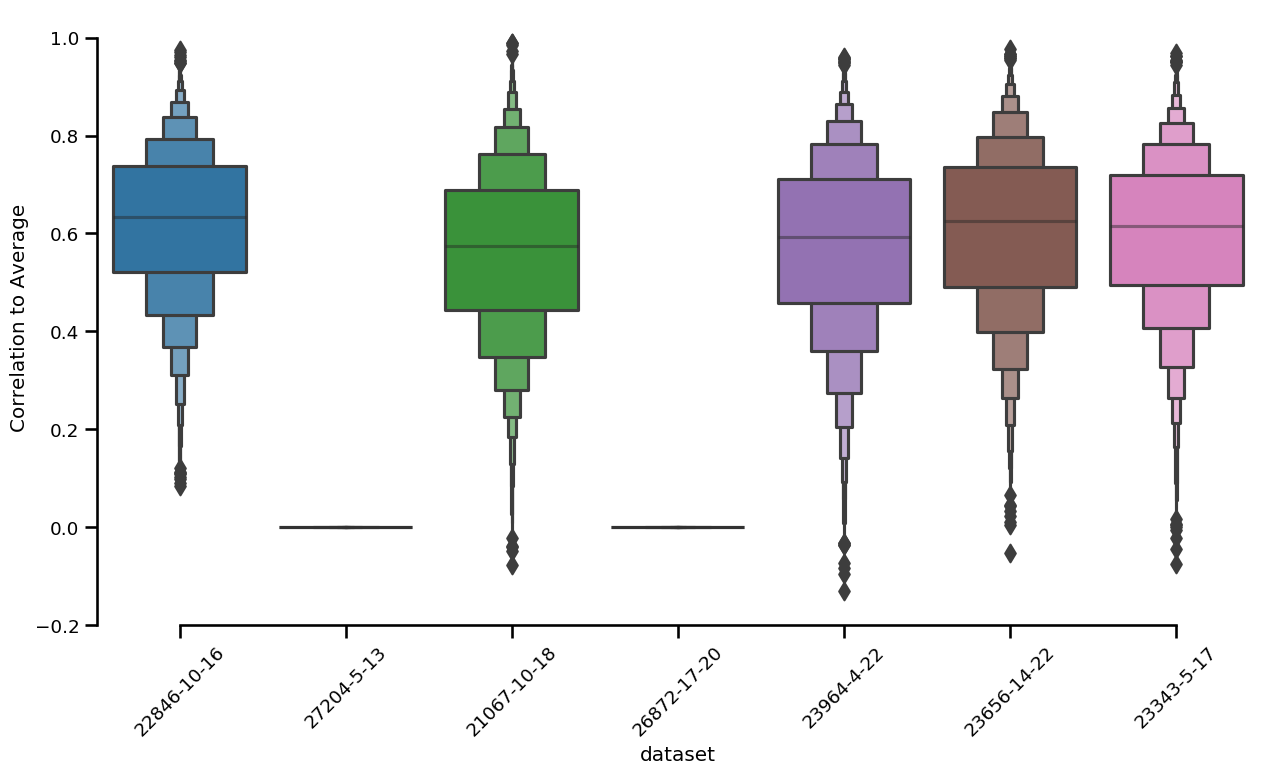

In [20]:
fig = plt.figure(figsize=(15,8))
sns.boxenplot(x="dataset", y=measure_attribute, data=df, )
plt.xticks(rotation = 45);
sns.despine(trim=True)

In [21]:
average_cta = []
for key in correlation_to_average.keys():
    if key != '27204-5-13' and key != '26872-17-20':
        average_cta.append(correlation_to_average[key].mean())
np.mean(average_cta)

0.5929383

## Fraction of explainable variance explained

In [22]:
feves = get_fev(model, dataloaders, tier="test", device="cuda", as_dict=True)


In [23]:
measure_attribute = "FEVE"
df = get_df_for_scores(session_dict=feves,
                                    measure_attribute=measure_attribute,
                      )

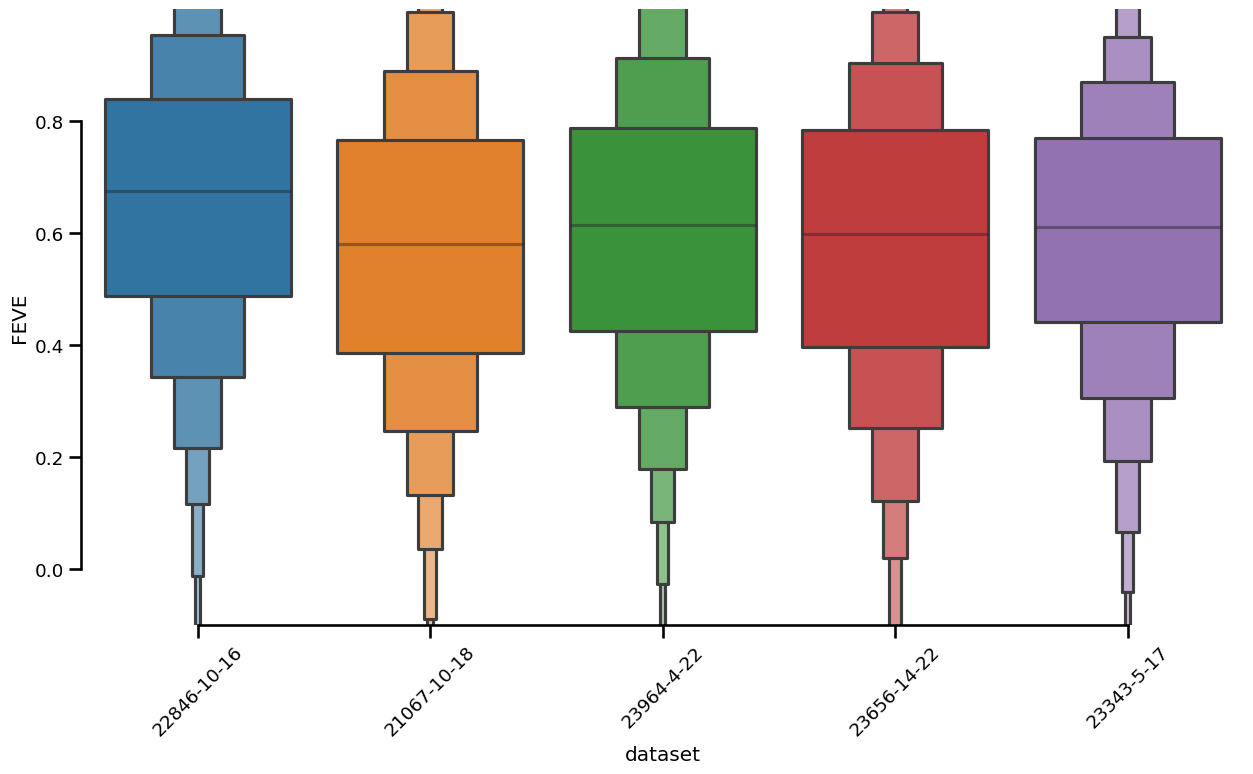

In [24]:
fig = plt.figure(figsize=(15,8))
sns.boxenplot(x="dataset", y=measure_attribute, data=df, )
plt.xticks(rotation = 45);
plt.ylim([-.1, 1])
sns.despine(trim=True)

In [25]:
average_feves = []
for key in feves.keys():
    if key != '27204-5-13' and key != '26872-17-20':
        average_feves.append(feves[key].mean())
np.mean(average_feves)

0.60130227

---

# Show Readout Positions 

This section of the notebook shows how the model is learning retinotopy:
we show how the readout position of the each neuron (i.e. the receptive field center) corresponds to its coordinates within visual cortex.

In [28]:
from PIL import ImageColor
from sensorium.utility.measure_helpers import ColorMap2D, get_base_colormap, get_color

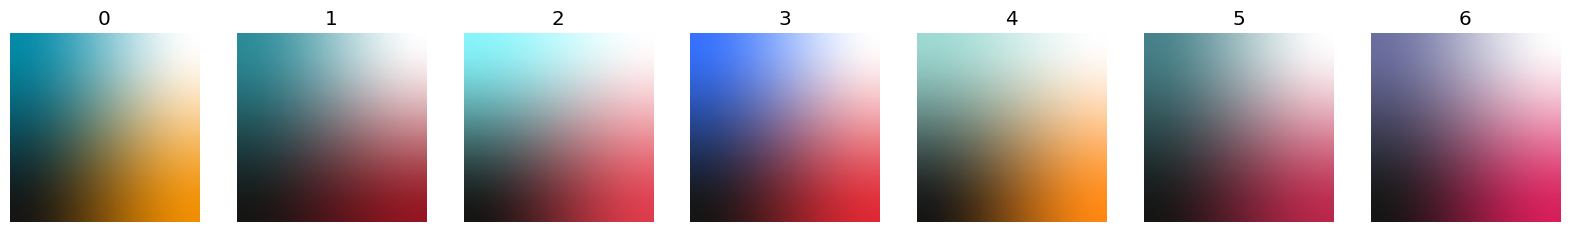

In [29]:
# set up a few appealing color gradients
colors = [['#048BA8', '#FFFFFF','#151514','#F18F01'],
           ['#2C8C99', '#FFFFFF','#151514','#931621'],
           ['#87F5FB', '#FFFFFF','#151514','#DE3C4B'],
           ['#3772FF', '#FFFFFF','#151514','#DF2935'],
           ['#9DD9D2', '#FFFFFF','#151514','#FF8811'],
           ['#468189', '#FFFFFF','#151514','#BA274A'],
           ['#6C6EA0', '#FFFFFF','#151514','#D81E5B'],]

fig, axs = plt.subplots(1, len(colors), figsize=(20,5))
for i, ax in enumerate(axs.ravel()):
    rgb_colors = [ImageColor.getcolor(i, "RGB") for i in colors[i]]
    img = get_base_colormap(*rgb_colors, interpolation="smooth")
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(str(i))

### Sensorium dataset

In [30]:
dataset_name = "26872-17-20"

In [31]:
cell_motor_coordinates = (dataloaders["train"][dataset_name].dataset.neurons.cell_motor_coordinates)

readout_pos = model.readout[dataset_name].mu.squeeze().detach().cpu().numpy()

### Readout Positions (i.e. Receptive field centers relative to the center of the presented image)

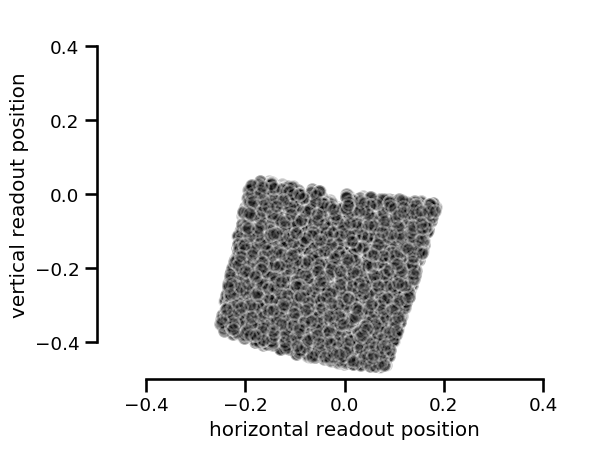

In [32]:
plt.scatter(*readout_pos.T, alpha=.25, c="k", edgecolor="w")
plt.xlim([-.5, .5])
plt.ylim([-.5, .5])
plt.xlabel("horizontal readout position")
plt.ylabel("vertical readout position")
sns.despine(trim=True)

## Relating the Readout locations to the Anatomical Coordinates

Text(0, 0.5, 'y coordinate (μm)')

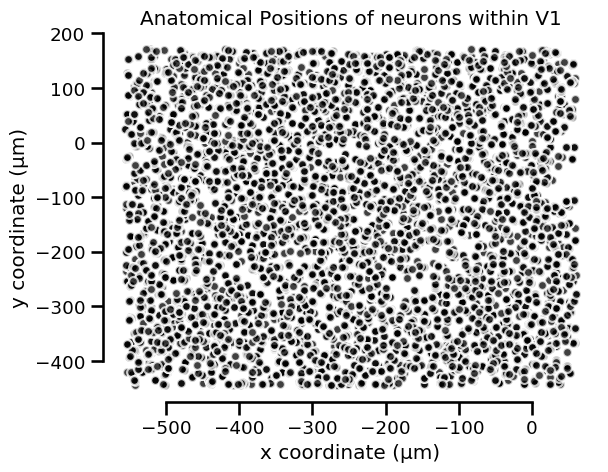

In [33]:
# show anatomical coordinates of all Neurons of this dataset
plt.scatter(cell_motor_coordinates[:, 0],cell_motor_coordinates[:,1] ,c='k',edgecolor="w", alpha=.75, s=40,)
sns.despine(trim=True)
plt.title("Anatomical Positions of neurons within V1")
plt.xlabel('x coordinate (μm)')
plt.ylabel('y coordinate (μm)')

### Now we color each neuron with a color based on the RF center

### Now we color each neuron with a color based on the RF center

In [34]:
# instantiate 2D Colormap Class with the base colormap
Cmap_2D = ColorMap2D(img,) 
cbar_rgb = Cmap_2D.generate_cbar()

# get RGB tuples for all readout positions based on the colormap
# set vmin/vmax to +- .25
rgb = Cmap_2D(*readout_pos.T.clip(-.25,.25))

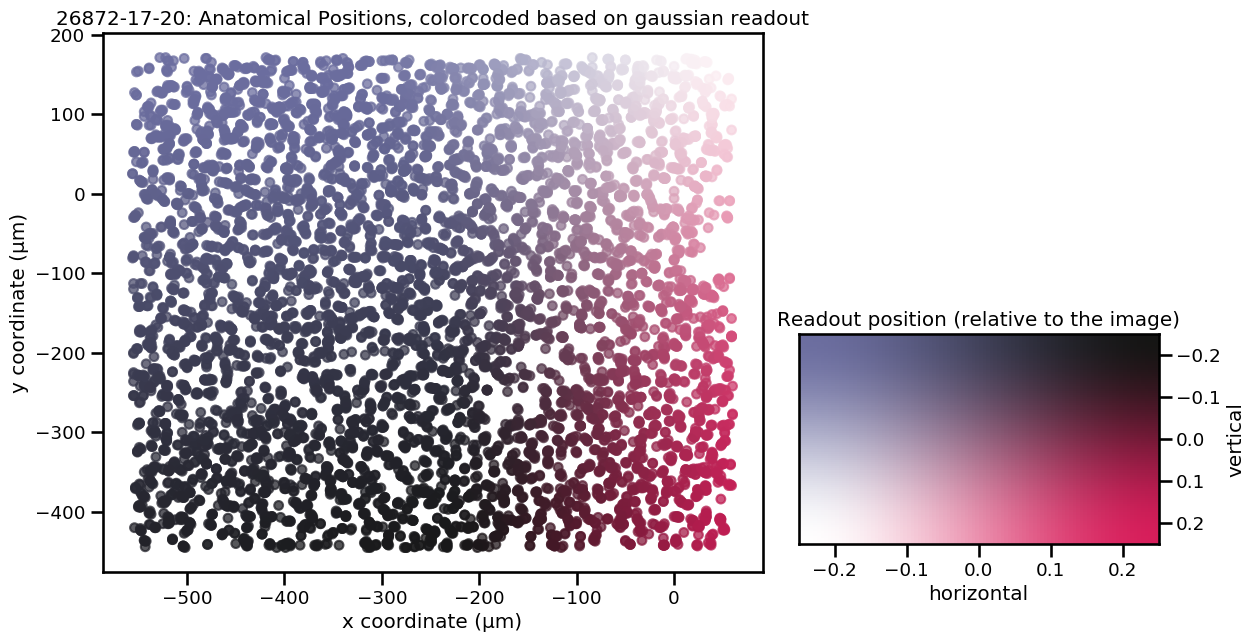

In [35]:
fig, ax = plt.subplots(figsize=(12, 7))

# Show Anatomical Positions
ax.scatter(cell_motor_coordinates[:, 0],cell_motor_coordinates[:,1] ,c=rgb.squeeze(), alpha=.75, s=40,)
ax.set_title(f"{dataset_name}: Anatomical Positions, colorcoded based on gaussian readout")
ax.set_xlabel('x coordinate (μm)')
ax.set_ylabel('y coordinate (μm)')

plt.subplots_adjust(left=0.1, right=0.65)

# Show 2D Colormap of the Gaussian Readout
bar_ax = fig.add_axes([0.68, 0.15, 0.3, 0.3])
cmap_extent = (-.25, .25, -.25, .25)
bar_ax.imshow(cbar_rgb, extent=cmap_extent, aspect='auto',origin="lower")

bar_ax.set_title(f'Readout position (relative to the image)')
bar_ax.set_xlabel('horizontal')
bar_ax.set_ylabel('vertical')
bar_ax.yaxis.tick_right()
bar_ax.yaxis.set_label_position('right')
bar_ax.invert_yaxis()

plt.show()

# Repeat for all 7 sessions

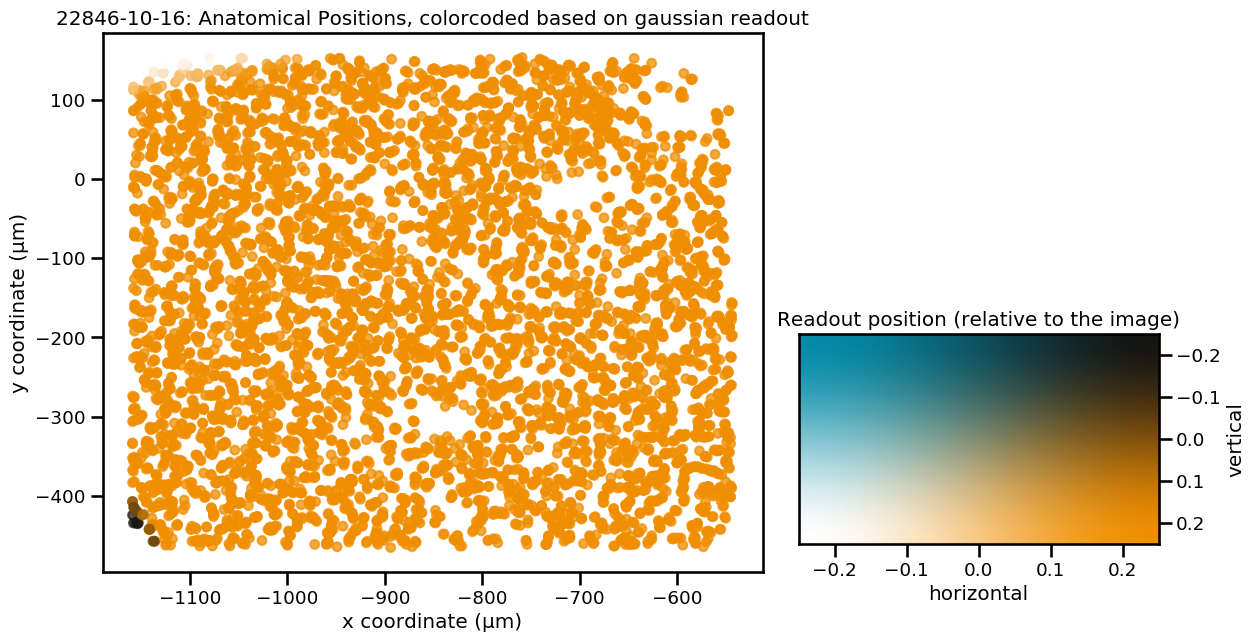

IndexError: index -9223372036854775808 is out of bounds for axis 1 with size 200

In [36]:
for i, (dataset_name, dataloader) in enumerate(dataloaders["train"].items()):
    
    # get anatomical and model readout coordinates
    cell_motor_coordinates = (dataloaders["train"][dataset_name].dataset.neurons.cell_motor_coordinates)
    readout_pos = model.readout[dataset_name].mu.squeeze().detach().cpu().numpy()
    
    # get colormap
    rgb_colors = [ImageColor.getcolor(j, "RGB") for j in colors[i]]
    img = get_base_colormap(*rgb_colors, interpolation="smooth")
    Cmap_2D = ColorMap2D(img,) 
    cbar_rgb = Cmap_2D.generate_cbar()
    rgb = Cmap_2D(*readout_pos.T.clip(-.25,.25))
    
    fig, ax = plt.subplots(figsize=(12, 7))

    # Show Anatomical Positions
    ax.scatter(cell_motor_coordinates[:, 0],cell_motor_coordinates[:,1] ,c=rgb.squeeze(), alpha=.75, s=40,)
    ax.set_title(f"{dataset_name}: Anatomical Positions, colorcoded based on gaussian readout")
    ax.set_xlabel('x coordinate (μm)')
    ax.set_ylabel('y coordinate (μm)')

    plt.subplots_adjust(left=0.1, right=0.65)

    # Show 2D Colormap of the Gaussian Readout
    bar_ax = fig.add_axes([0.68, 0.15, 0.3, 0.3])
    cmap_extent = (-.25, .25, -.25, .25)
    bar_ax.imshow(cbar_rgb, extent=cmap_extent, aspect='auto',origin="lower")

    bar_ax.set_title(f'Readout position (relative to the image)')
    bar_ax.set_xlabel('horizontal')
    bar_ax.set_ylabel('vertical')
    bar_ax.yaxis.tick_right()
    bar_ax.yaxis.set_label_position('right')
    bar_ax.invert_yaxis()

    plt.show()